https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/

https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/



---



#Step 1: Import IRIS Dataset

##1a) Import Libraries

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets

##1b) Load Iris Dataset

In [72]:
iris = datasets.load_iris()

##1c) Slicing Out First Two Features (for X)

In [73]:
X = iris.data[:, :2] 
# we only take the first two features. 
# we slice the first two columns 

# 'feature_names': ['sepal length (cm)',
#  'sepal width (cm)',
#  'petal length (cm)',
#  'petal width (cm)'],

#we only take SEPAL LENGTH and SEPAL WIDTH (as features..X)
#to predict the TARGET (y)

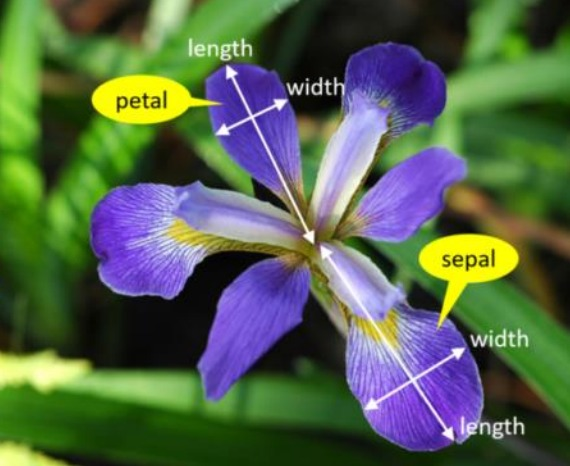

##1d) Making the Predicted Target y

In [74]:
y = iris.target

#'target_names': array(['setosa', 'versicolor', 'virginica']
# 0 = setosa
# 1 = versicolor
# 2 = virginica



---



#Step 2: Train Test Split

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

#20% Testing, 80% Training



---



#Step 3: Training the SVM Model

In [76]:
from sklearn.svm import SVC

svc = svm.SVC().fit(X_train, y_train)



---



##Step 4: Plotting the SVM

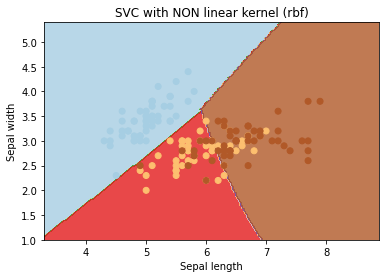

In [77]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with NON linear kernel (rbf)')
plt.show()

In [78]:
#Here u see that the SVM has non-linear boundaries
#It manages to classify into 3 categories:
# 0 = setosa
# 1 = versicolor
# 2 = virginica
#(but i'm not sure how the color matches those categories...)



---



#Step 5: Predicting the X test dataset

In [79]:
y_pred = svc.predict(X_test)

#y_pred takes on all the Predicted values of X_test



---



#Step 6: Confusion Matrix

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0  6  4]
 [ 0  3  2]]


Text(33.0, 0.5, 'Actual Class')

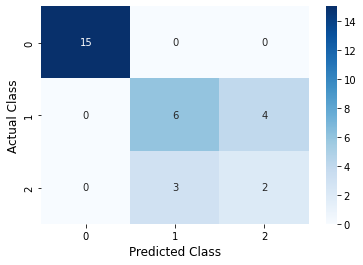

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Actual Class', fontsize=12)



---



#Step 7: Accuracy Score

In [82]:
from sklearn.metrics import accuracy_score

print("Accuracy:", np.round(accuracy_score(y_test, y_pred),2))

Accuracy: 0.77




---



#Step 8: Future Work -- Hyperparameter Tuning

In [83]:
# Check default values
import pandas as pd

svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1




---



#Step 9: Conclusion

In [84]:
#We used a Simple SVM applied to Iris Dataset 
#(only using Sepal Length and Sepal Width as features to predict the Class)

#Accuracy = 77%

#We left ALL HYPERPARAMETERS as DEFAULT, notably:
#   Regularization Parameter C = 1
#   Gamma = 'scale', i.e. gamma = 1 / (n_features * X.var())
#   we shall explore how C and Gamma affects the model in the next manuscript

#   Kernel = 'rbf' (meaning its NON LINEAR)
#   we shall explore the different types of Kernel in the next manuscript




---



#THE END

---

